import pandas as pd

def load_and_save_data(file_path, output_path):
    # List of possible encodings to try
    encodings = ['utf-8', 'ISO-8859-1', 'cp1252', 'utf-16']
    for enc in encodings:
        try:
            # Try to read the CSV with the current encoding
            data = pd.read_csv(file_path, encoding=enc)
            print(f"Data successfully loaded with encoding: {enc}")
            
            # Optionally perform any data cleaning or manipulation here
            # For example:
            # data.fillna(method='ffill', inplace=True)
            # data['Date'] = pd.to_datetime(data['Date'])

            # Save the corrected data to a new file
            data.to_csv(output_path, index=False, encoding='utf-8')
            print(f"Data saved to {output_path} using utf-8 encoding.")
            return data
        except UnicodeDecodeError as e:
            print(f"Failed to load data using {enc} encoding. Error: {e}")
        except Exception as e:
            print(f"An error occurred: {e}")

    print("Failed to load data with any of the tried encodings.")
    return None

# Specify the path to your original and output file
original_file_path = 'Updated_Combined_Sales_Data.csv'
new_file_path = 'Fixed_Combined_Sales_Data.csv'

# Load the data, handle it, and save it
loaded_data = load_and_save_data(original_file_path, new_file_path)

# If data was loaded and saved, print the first few rows to verify
if loaded_data is not None:
    print(loaded_data.head())


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Fixed_Combined_Sales_Data.csv')


In [7]:
# Display the first few rows of the DataFrame
print(data.head())

# Get a concise summary of the DataFrame
print(data.info())

# Describe the data to get statistical summaries of numerical columns
print(data.describe())

# Check for any missing values
print(data.isnull().sum())


    No        Date DateOfWeek   Eat In  TotalNetSales  Forecast  \
0  1.0  17/05/2021        Mon  1318.37        2118.92    2500.0   
1  2.0  18/05/2021        Tue  1779.13        2255.63    2500.0   
2  3.0  19/05/2021        Wed  2033.29        2713.71    2500.0   
3  4.0  20/05/2021        Thu  2145.98        3019.60    2800.0   
4  5.0  21/05/2021        Fri  3511.22        5420.47    3500.0   

   VarianceÂ (NetÂ SalesÂ -Â LastÂ Year)  Is_Holiday Holiday_Name  temp  \
0                                 933.34         0.0          NaN  10.6   
1                                 846.74         0.0          NaN  10.2   
2                                1069.98         0.0          NaN  10.3   
3                                1043.05         0.0          NaN  10.0   
4                                2817.46         0.0          NaN   9.4   

   feelslike              conditions  \
0        9.5  Rain, Partially cloudy   
1        9.2  Rain, Partially cloudy   
2        9.2  Rain, Partia

In [3]:
# Example: Fill missing values, if any, or drop them
data.fillna(method='ffill', inplace=True)  # or use data.dropna(inplace=True)

# Convert data types if necessary
data['Date'] = pd.to_datetime(data['Date'])


C:\Users\saika\AppData\Local\Temp\ipykernel_3820\1131047444.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # or use data.dropna(inplace=True)
C:\Users\saika\AppData\Local\Temp\ipykernel_3820\1131047444.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting aesthetic style for better visuals
sns.set(style="whitegrid")

# Histogram of a numeric column
plt.figure(figsize=(10, 6))
sns.histplot(data['some_numeric_column'], kde=True)
plt.title('Distribution of Some Numeric Column')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['some_numeric_column'])
plt.title('Boxplot for Detecting Outliers in Some Numeric Column')
plt.show()

# Scatter plot to examine potential correlations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='some_numeric_column', y='another_numeric_column', data=data)
plt.title('Relationship between Two Variables')
plt.show()

# Time series plot if Date is a feature
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='some_numeric_column', data=data)
plt.title('Time Series Analysis of Some Numeric Column')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

KeyError: 'some_numeric_column'

<Figure size 1000x600 with 0 Axes>

In [7]:
# Print the column names of the DataFrame
print(data.columns)


Index(['No', 'Date', 'DateOfWeek', 'Eat In', 'TotalNetSales', 'Forecast',
       'VarianceÂ (NetÂ SalesÂ -Â LastÂ Year)', 'Is_Holiday', 'Holiday_Name',
       'temp', 'feelslike', 'conditions', 'description', 'icon'],
      dtype='object')


C:\Users\saika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


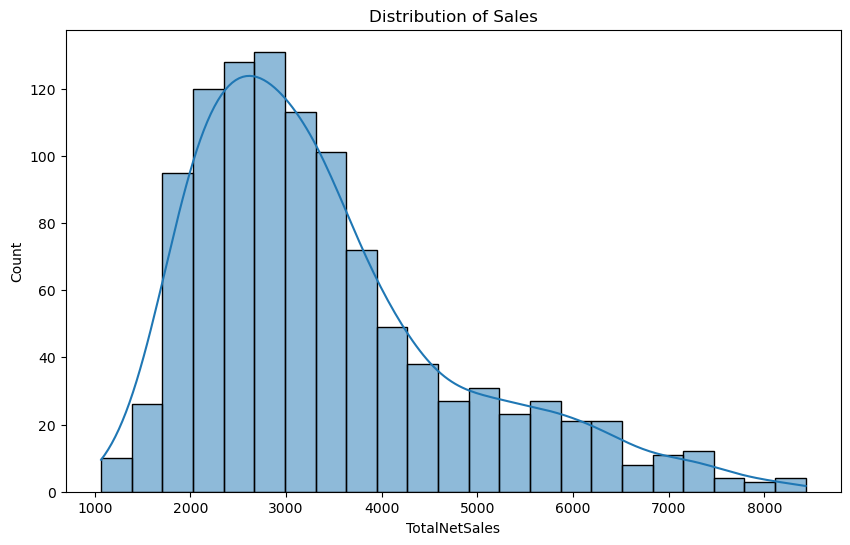

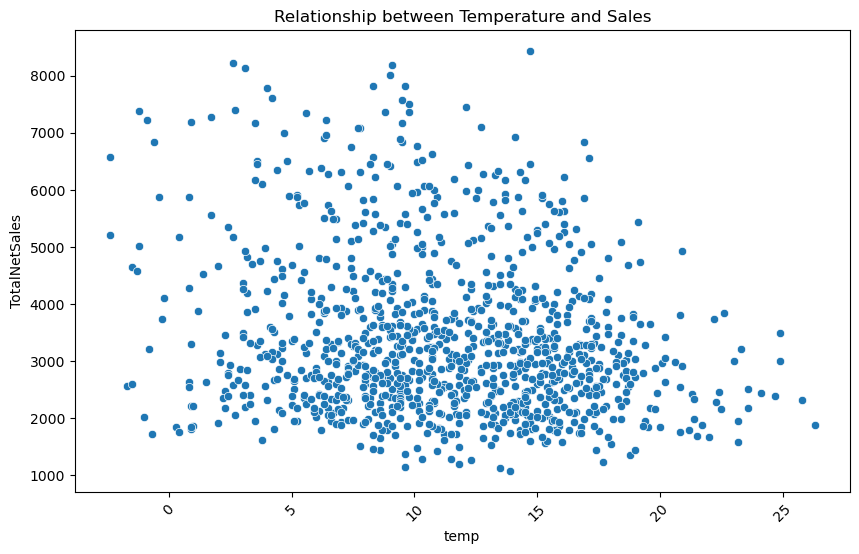

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of the 'Sales' column
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalNetSales'], kde=True)  # Replace 'some_numeric_column' with 'Sales'
plt.title('Distribution of Sales')
plt.show()

# Scatter plot to examine the relationship between 'Sales' and 'Temperature'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='TotalNetSales', data=data)  # Use actual column names
plt.title('Relationship between Temperature and Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [9]:
# Convert 'icon' into dummy variables
icon_dummies = pd.get_dummies(data['icon'], prefix='Icon')

# Append these dummy columns to the original DataFrame
data = pd.concat([data, icon_dummies], axis=1)

In [10]:
# Define a mapping from day of the week to a numeric value
day_mapping = {
    'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 
    'Fri': 5, 'Sat': 6, 'Sun': 7
}

# Apply this mapping to the DateOfWeek column
data['DateOfWeekNumeric'] = data['DateOfWeek'].map(day_mapping)


In [11]:
# Include the dummy variables and other numeric columns you want to analyze
columns_to_analyze = ['TotalNetSales', 'Is_Holiday', 'temp'] + list(icon_dummies.columns)
numeric_data = data[columns_to_analyze]


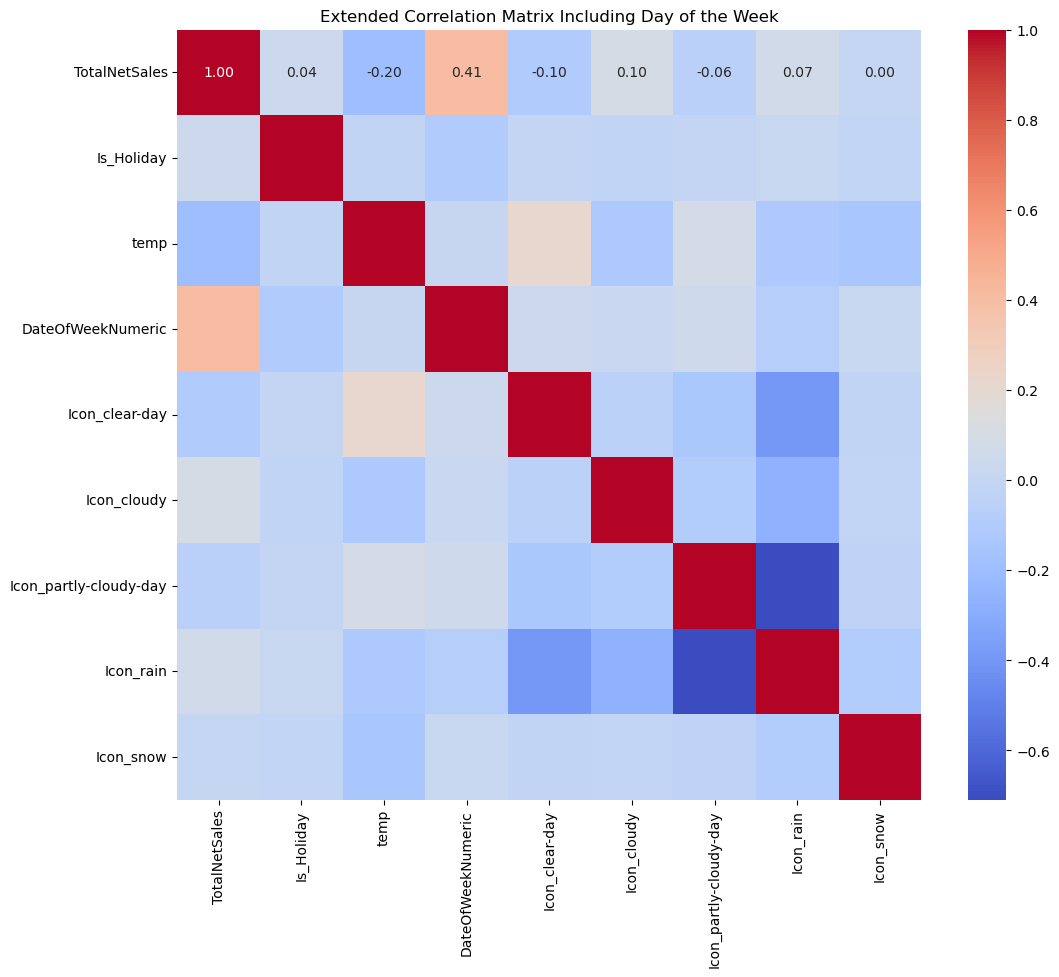

In [12]:
# Select columns including the new DateOfWeekNumeric for correlation
columns_for_correlation = ['TotalNetSales', 'Is_Holiday', 'temp', 'DateOfWeekNumeric'] + list(data.columns[data.columns.str.startswith('Icon_')])

# Subset the data for correlation
numeric_data = data[columns_for_correlation]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Extended Correlation Matrix Including Day of the Week')
plt.show()


In [13]:
import pandas as pd

# Sample loading of your DataFrame
data = pd.read_csv('Fixed_Combined_Sales_Data.csv')

# Convert 'DayOfWeek' into numeric format
day_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
data['DateOfWeekNumeric'] = data['DateOfWeek'].map(day_mapping)

# One-hot encode 'icon'
icon_dummies = pd.get_dummies(data['icon'], prefix='Icon')

# Concatenate these new columns back to the original dataframe
data = pd.concat([data, icon_dummies], axis=1)


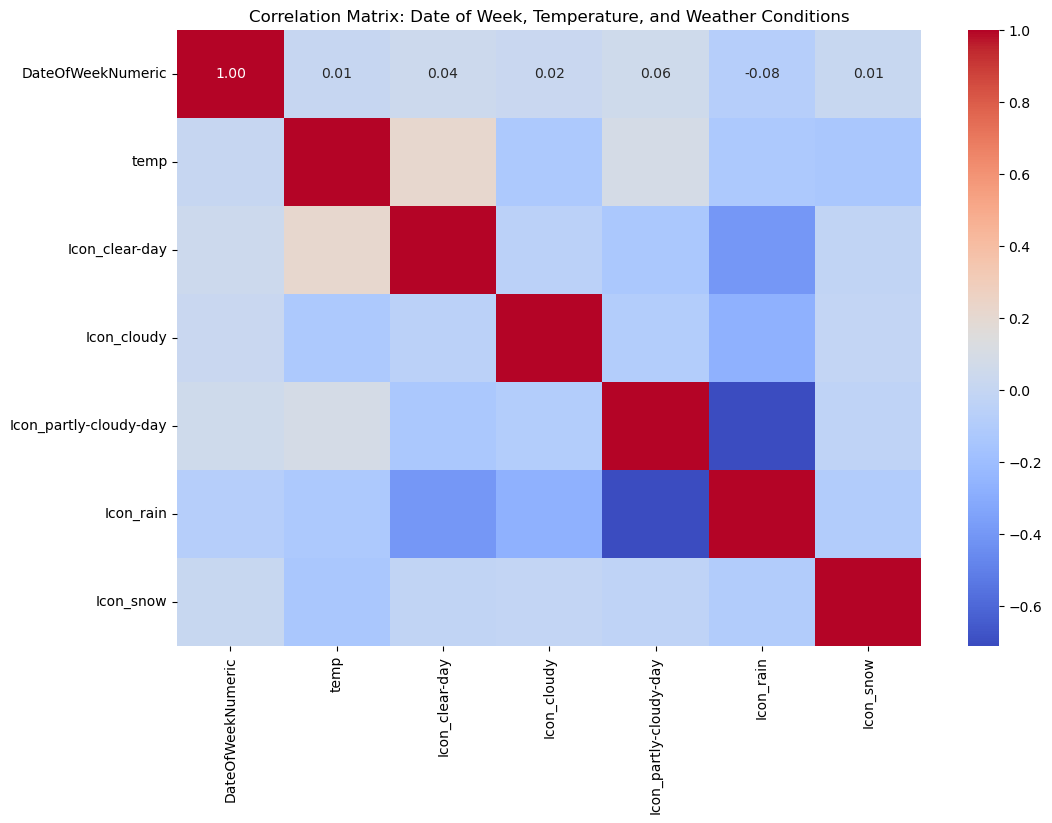

In [14]:
# Select columns for correlation matrix calculation
columns_to_correlate = ['DateOfWeekNumeric', 'temp'] + list(icon_dummies.columns)

# Calculate correlation matrix
correlation_matrix = data[columns_to_correlate].corr()

# Display correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Date of Week, Temperature, and Weather Conditions')
plt.show()


In [15]:
import pandas as pd

# Sample data loading
data = pd.read_csv('Fixed_Combined_Sales_Data.csv')

# Group data by 'Date' and 'icon' (weather condition), summing up the TotalNetSales
grouped_data = data.groupby(['Date', 'icon'])['TotalNetSales'].sum().reset_index()

# Display the first few rows to check the grouped data
print(grouped_data.head())


         Date               icon  TotalNetSales
0  01/02/2022               rain        2752.08
1  01/02/2023  partly-cloudy-day        3408.26
2  01/02/2024               rain        1948.15
3  01/03/2022               rain        2324.68
4  01/03/2023               rain        2685.70


C:\Users\saika\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


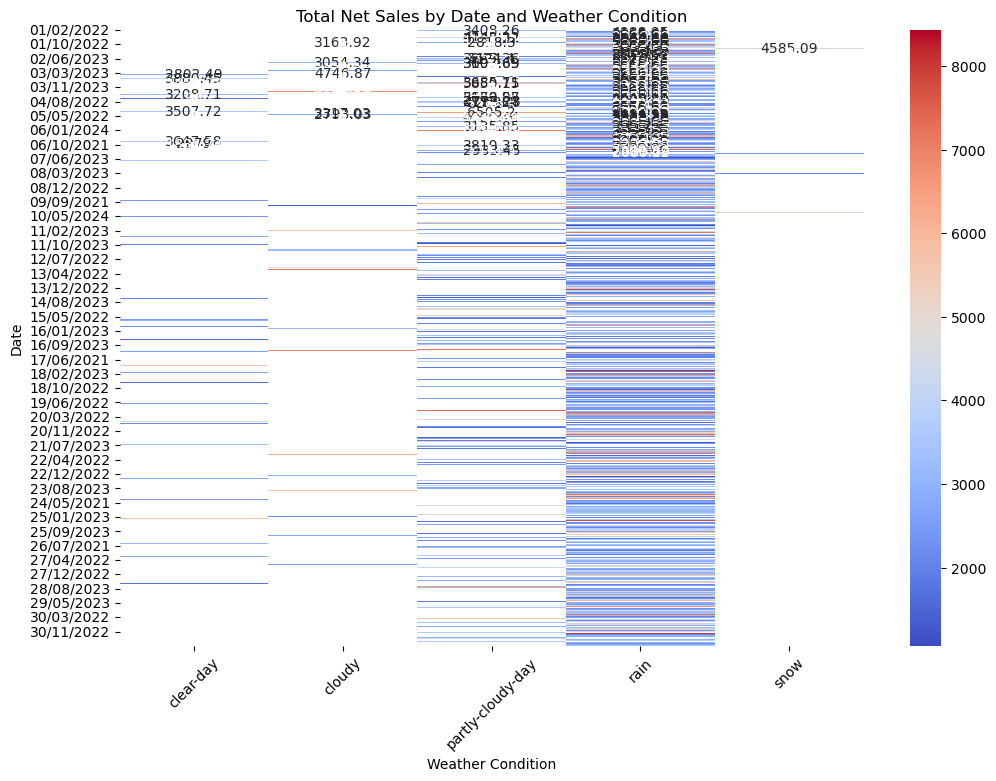

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'grouped_data' is already defined as described in previous steps:
# grouped_data = data.groupby(['Date', 'icon'])['TotalNetSales'].sum().reset_index()

# Correct the pivot call to use keyword arguments
pivot_table = grouped_data.pivot(index='Date', columns='icon', values='TotalNetSales')

# Plot the data using seaborn's heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt="g")  # 'g' as a generic number format
plt.title('Total Net Sales by Date and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Date')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


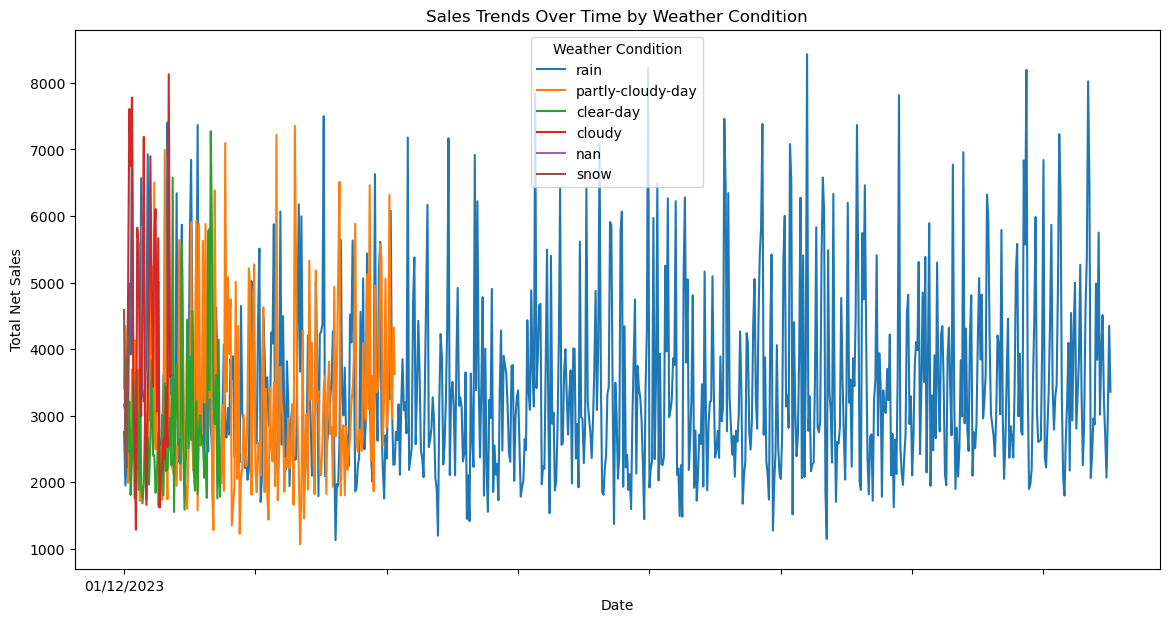

In [17]:
# Create a line plot for sales data filtered by weather condition
plt.figure(figsize=(14, 7))
for condition in data['icon'].unique():
    subset = data[data['icon'] == condition]
    subset.groupby('Date')['TotalNetSales'].sum().plot(label=str(condition))

plt.title('Sales Trends Over Time by Weather Condition')
plt.xlabel('Date')
plt.ylabel('Total Net Sales')
plt.legend(title='Weather Condition')
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# If 'Date' is not a datetime object, convert it
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate sales by date
daily_sales = data.groupby('Date')['TotalNetSales'].sum().reset_index()


C:\Users\saika\AppData\Local\Temp\ipykernel_3820\3411763175.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


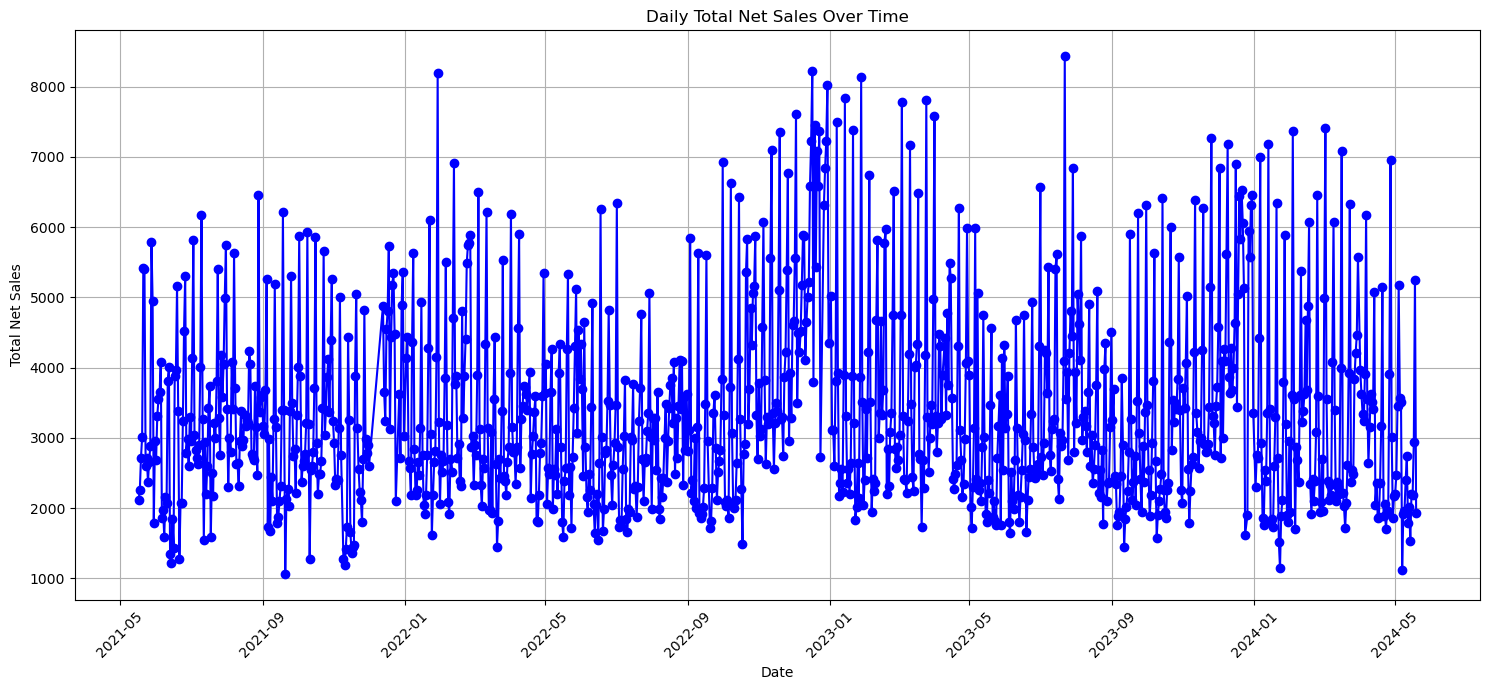

In [19]:
# Plotting daily sales
plt.figure(figsize=(15, 7))  # Set the figure size for a clear view
plt.plot(daily_sales['Date'], daily_sales['TotalNetSales'], marker='o', linestyle='-', color='blue')
plt.title('Daily Total Net Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Net Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels if necessary
plt.tight_layout()  # Adjust layout
plt.show()


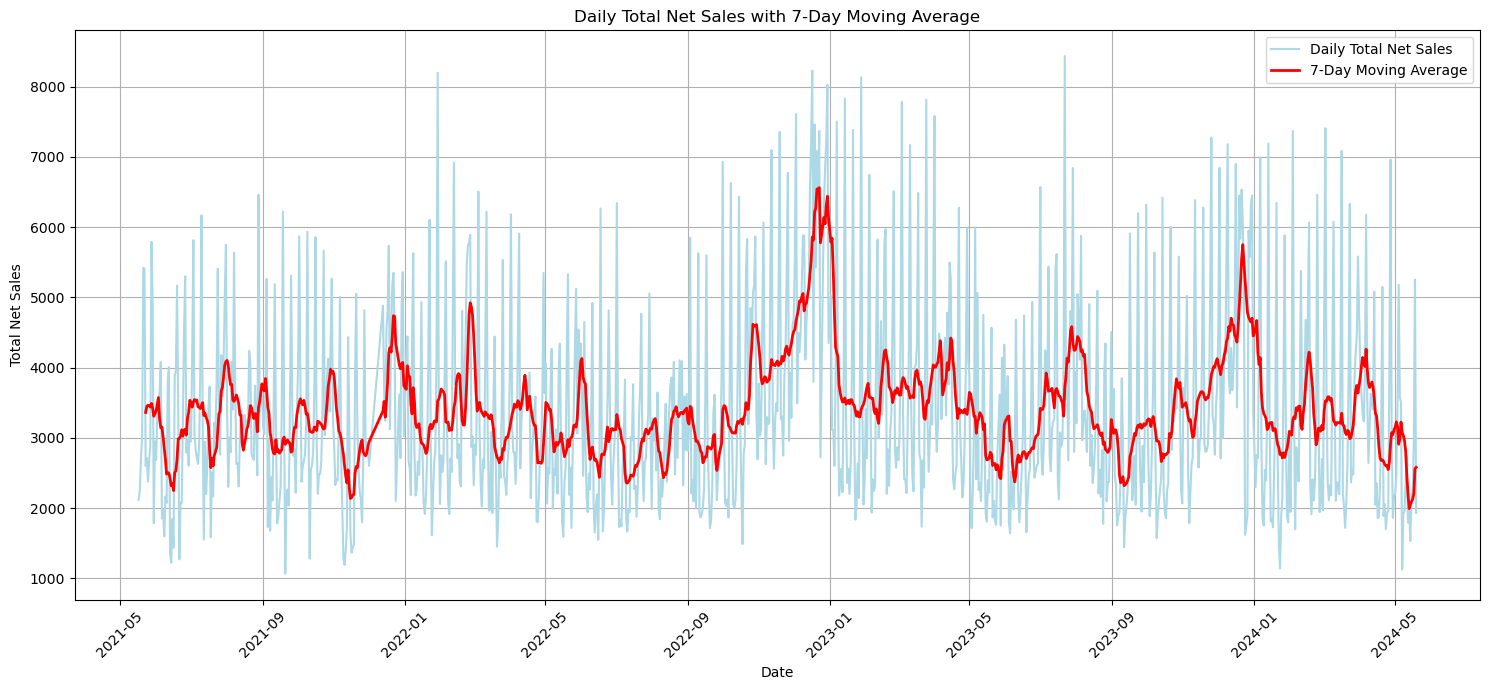

In [20]:
# Calculate the 7-day moving average of daily sales
daily_sales['7_day_MA'] = daily_sales['TotalNetSales'].rolling(window=7).mean()

# Plot the original daily sales and the moving average
plt.figure(figsize=(15, 7))
plt.plot(daily_sales['Date'], daily_sales['TotalNetSales'], label='Daily Total Net Sales', color='lightblue')
plt.plot(daily_sales['Date'], daily_sales['7_day_MA'], label='7-Day Moving Average', color='red', linewidth=2)
plt.title('Daily Total Net Sales with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Net Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


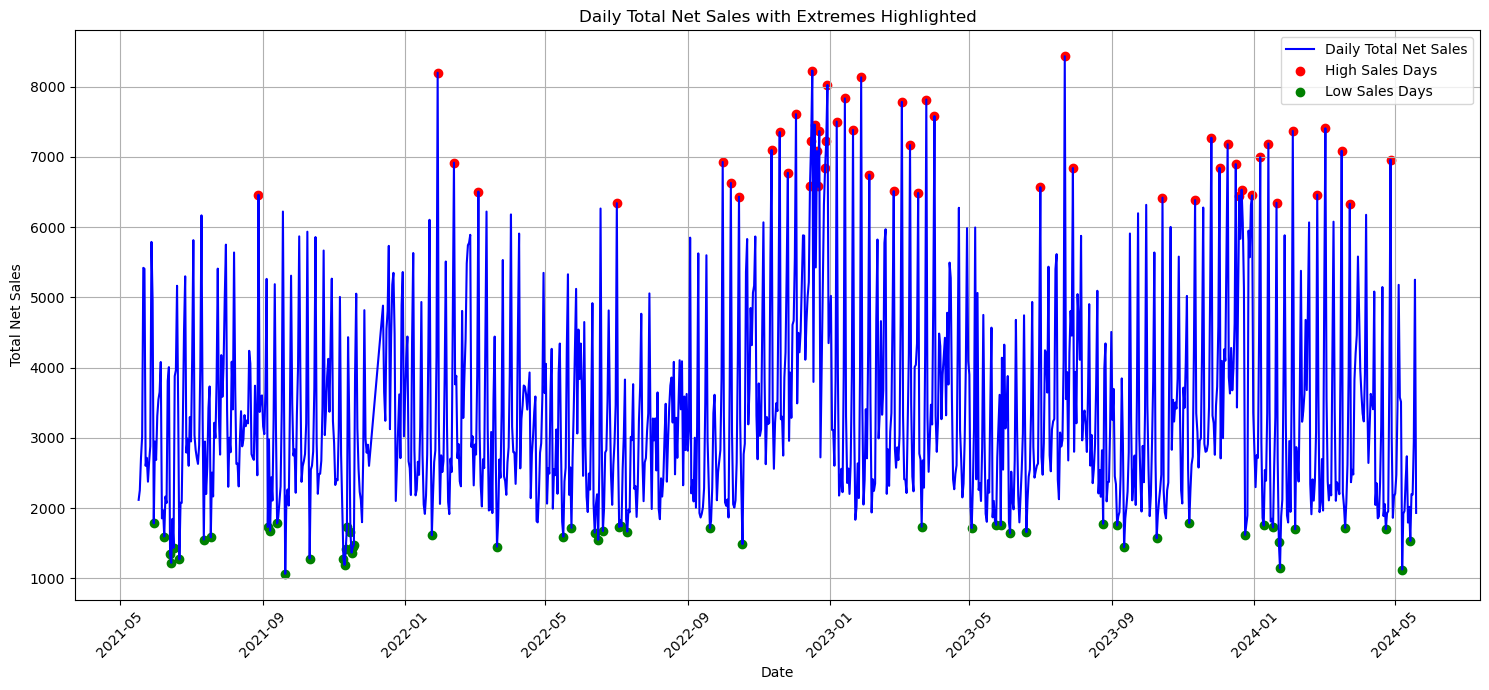

In [21]:
# Identify high and low sales days
high_sales_threshold = daily_sales['TotalNetSales'].quantile(0.95)
low_sales_threshold = daily_sales['TotalNetSales'].quantile(0.05)

# Plot with highlights for extreme sales days
plt.figure(figsize=(15, 7))
plt.plot(daily_sales['Date'], daily_sales['TotalNetSales'], label='Daily Total Net Sales', color='blue')
plt.scatter(daily_sales['Date'][daily_sales['TotalNetSales'] >= high_sales_threshold], daily_sales['TotalNetSales'][daily_sales['TotalNetSales'] >= high_sales_threshold], color='red', label='High Sales Days')
plt.scatter(daily_sales['Date'][daily_sales['TotalNetSales'] <= low_sales_threshold], daily_sales['TotalNetSales'][daily_sales['TotalNetSales'] <= low_sales_threshold], color='green', label='Low Sales Days')
plt.title('Daily Total Net Sales with Extremes Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Net Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


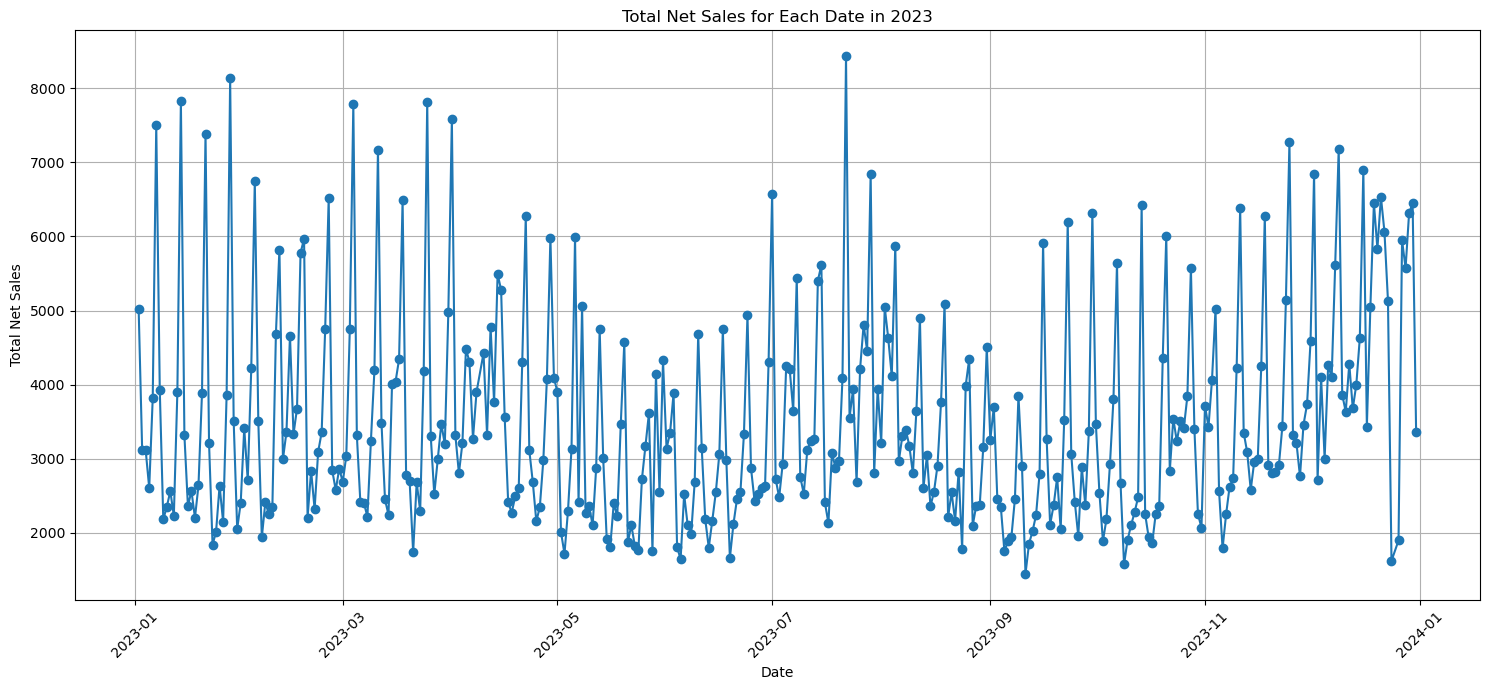

In [22]:
# Filtering data for a specific year for clarity
yearly_sales = daily_sales[daily_sales['Date'].dt.year == 2023]

plt.figure(figsize=(15, 7))
plt.plot(yearly_sales['Date'], yearly_sales['TotalNetSales'], marker='o', linestyle='-')
plt.title('Total Net Sales for Each Date in 2023')
plt.xlabel('Date')
plt.ylabel('Total Net Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# Ensure 'Date' is a datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Extract the day of the week name (Monday, Tuesday, etc.)
data['DayOfWeek'] = data['Date'].dt.day_name()

# Calculate the average sales for each day of the week
average_sales_by_day = data.groupby('DayOfWeek')['TotalNetSales'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

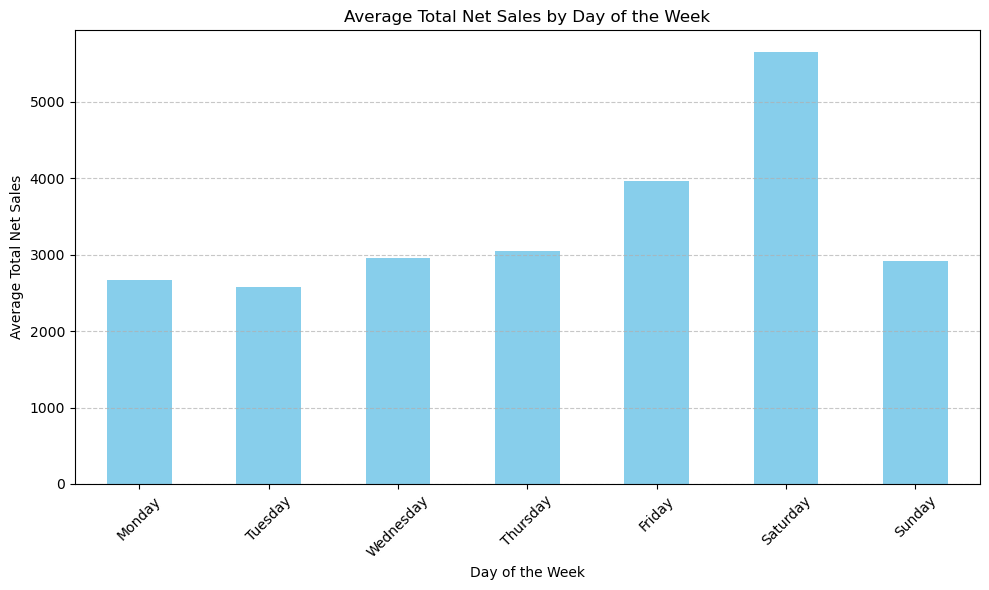

In [24]:
# Plotting the average sales by day of the week
plt.figure(figsize=(10, 6))
average_sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Total Net Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Net Sales')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [25]:
data['Date'] = pd.to_datetime(data['Date'])

# Assume Is_Holiday marks 1 for holidays and 0 for normal days
data['Day_Type'] = data['Is_Holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Normal Day')

In [26]:
# Calculate average sales by day type
average_sales_by_type = data.groupby('Day_Type')['TotalNetSales'].mean()

# Print the average sales for comparison
print(average_sales_by_type)


Day_Type
Holiday       3831.912353
Normal Day    3394.954149
Name: TotalNetSales, dtype: float64


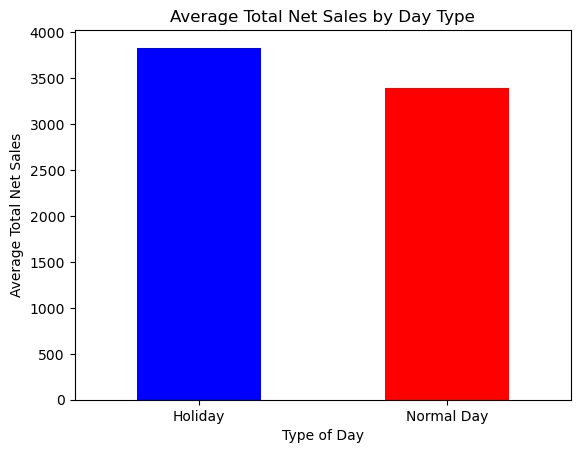

In [27]:
import matplotlib.pyplot as plt

# Plotting the average sales by day type
average_sales_by_type.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Total Net Sales by Day Type')
plt.xlabel('Type of Day')
plt.ylabel('Average Total Net Sales')
plt.xticks(rotation=0)  # Keep labels horizontal for better readability
plt.show()


In [ ]:
!pip install 

In [28]:
import pandas as pd
from prophet import Prophet

# Load your dataset
data = pd.read_csv('Fixed_Combined_Sales_Data.csv')

# Convert 'Date' to datetime and ensure 'TotalNetSales' is numeric
data['Date'] = pd.to_datetime(data['Date'])
data['TotalNetSales'] = pd.to_numeric(data['TotalNetSales'], errors='coerce')

# Remove days with zero sales
data = data[data['TotalNetSales'] > 0]

# Prepare the data for Prophet: columns must be named 'ds' for dates and 'y' for the values
prophet_data = data[['Date', 'TotalNetSales']].rename(columns={'Date': 'ds', 'TotalNetSales': 'y'})


C:\Users\saika\AppData\Local\Temp\ipykernel_3820\533018520.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [29]:
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(prophet_data)

# Create a dataframe to hold the future predictions; here, we predict for the next 7 days
future_dates = model.make_future_dataframe(periods=7)

# Predict the future with the model
forecast = model.predict(future_dates)

# Print the forecasted data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))


15:25:08 - cmdstanpy - INFO - Chain [1] start processing
15:25:08 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
1075 2024-05-20  2086.058933  1054.926990  3062.002320
1076 2024-05-21  1970.131948   924.717726  3057.355388
1077 2024-05-22  2344.841422  1375.517645  3382.834305
1078 2024-05-23  2429.539963  1409.435079  3440.673071
1079 2024-05-24  3335.502367  2322.262682  4359.411079
1080 2024-05-25  5022.029350  3973.625348  6091.921060
1081 2024-05-26  2289.766626  1233.837913  3345.579414


C:\Users\saika\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\saika\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\saika\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

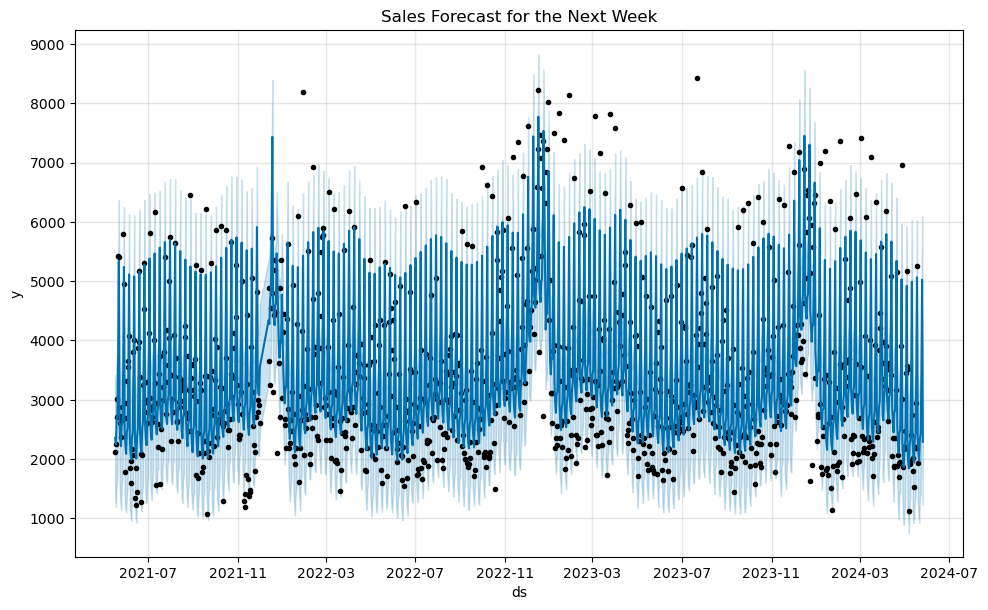

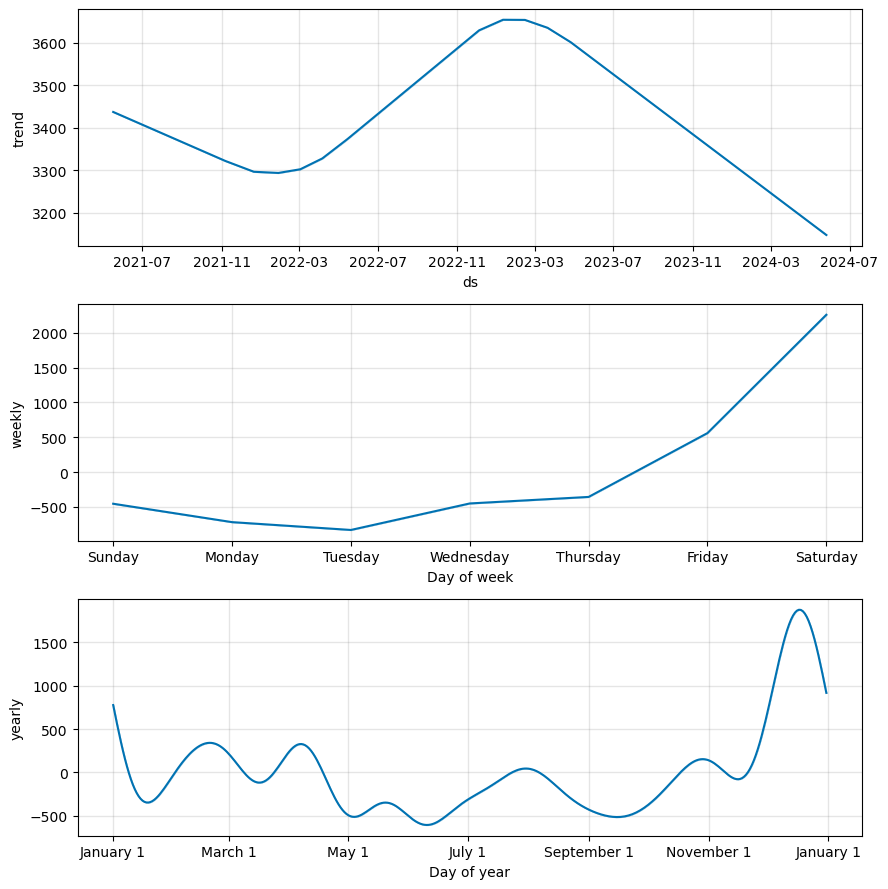

In [30]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast for the Next Week')

# Plot forecast components
fig2 = model.plot_components(forecast)


In [31]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your dataset
data = pd.read_csv('Fixed_Combined_Sales_Data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['TotalNetSales'] = pd.to_numeric(data['TotalNetSales'], errors='coerce')

# Remove days with zero sales
data = data[data['TotalNetSales'] > 0]

# Prepare the data for Prophet
prophet_data = data[['Date', 'TotalNetSales']].rename(columns={'Date': 'ds', 'TotalNetSales': 'y'})

# Create a train/test split (e.g., last 30 days as test)
train_data = prophet_data[:-30]
test_data = prophet_data[-30:]


C:\Users\saika\AppData\Local\Temp\ipykernel_3820\1580773489.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [32]:
# Initialize and fit the Prophet model on the training data
model = Prophet()
model.fit(train_data)


15:25:21 - cmdstanpy - INFO - Chain [1] start processing
15:25:21 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# Create future dataframe for predictions including the test set
future_dates = model.make_future_dataframe(periods=30)

# Predict the future
forecast = model.predict(future_dates)


In [34]:
# Extract the predicted values for the test period
predicted_sales = forecast['yhat'][-30:].reset_index(drop=True)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data['y'], predicted_sales))
print("Root Mean Square Error (RMSE):", rmse)

# Calculate R-squared as an accuracy metric
r_squared = test_data['y'].corr(predicted_sales) ** 2
print("R-squared:", r_squared)


Root Mean Square Error (RMSE): 794.562336925961
R-squared: nan


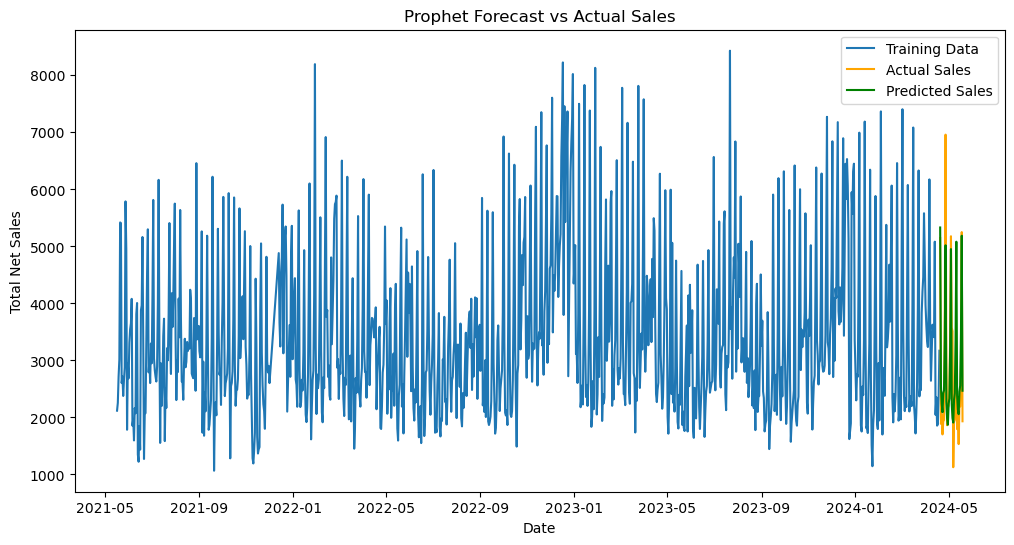

In [35]:
import matplotlib.pyplot as plt

# Plot the forecast alongside the actual sales
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Training Data')
plt.plot(test_data['ds'], test_data['y'], label='Actual Sales', color='orange')
plt.plot(future_dates[-30:]['ds'], predicted_sales, label='Predicted Sales', color='green')
plt.title('Prophet Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Total Net Sales')
plt.legend()
plt.show()


In [39]:
import numpy as np

# Check if there are any null values or extreme uniformity in the data
print("Any null in actual sales:", test_data['y'].isnull().any())
print("Any null in predictions:", predicted_sales.isnull().any())
print("Variance in actual sales:", np.var(test_data['y']))
print("Variance in predicted sales:", np.var(predicted_sales))

# Try calculating correlation manually to avoid issues
if not np.isclose(np.var(test_data['y']), 0) and not np.isclose(np.var(predicted_sales), 0):
    correlation = np.corrcoef(test_data['y'], predicted_sales)[0, 1]
    r_squared = correlation ** 2
    print("Manually calculated R-squared:", r_squared)
else:
    print("Variance too low, cannot compute R-squared reliably.")


Any null in actual sales: False
Any null in predictions: False
Variance in actual sales: 1740170.463222223
Variance in predicted sales: 1167685.430899924
Manually calculated R-squared: 0.6449371302506874


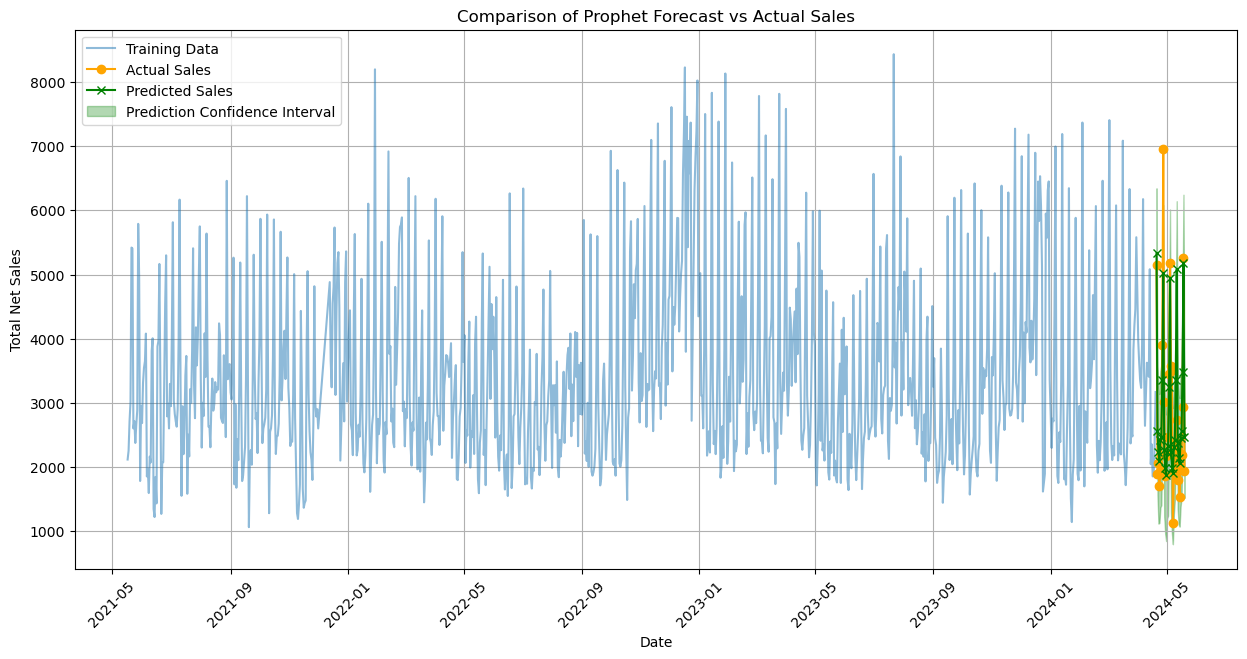

In [38]:
# Improved plotting to visualize discrepancies better
plt.figure(figsize=(15, 7))
plt.plot(train_data['ds'], train_data['y'], label='Training Data', alpha=0.5)
plt.plot(test_data['ds'], test_data['y'], 'o-', label='Actual Sales', color='orange')
plt.plot(future_dates[-30:]['ds'], predicted_sales, 'x-', label='Predicted Sales', color='green')
plt.fill_between(future_dates[-30:]['ds'], forecast['yhat_lower'][-30:], forecast['yhat_upper'][-30:], color='green', alpha=0.3, label='Prediction Confidence Interval')
plt.title('Comparison of Prophet Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Total Net Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [47]:
import pandas as pd
from prophet import Prophet

# Load your dataset
data = pd.read_csv('Fixed_Combined_Sales_Data.csv')
data['ds'] = pd.to_datetime(data['Date'])
data['y'] = data['TotalNetSales']

# Add weather data and encode weather conditions
data['temperature'] = data['feelslike']
weather_dummies = pd.get_dummies(data['icon'])
data = pd.concat([data, weather_dummies], axis=1)

# Define holidays and special events (Pre-Christmas two weeks)
holidays = data[data['Is_Holiday'] == 1][['ds', 'Holiday_Name']]
holidays['holiday'] = holidays['Holiday_Name']
holidays['lower_window'] = 0
holidays['upper_window'] = 1

# Add Pre-Christmas two weeks before 25th December each year
data['year'] = data['ds'].dt.year
pre_christmas_start = pd.to_datetime(data['year'].astype(str) + '-12-11')
pre_christmas_end = pd.to_datetime(data['year'].astype(str) + '-12-24')

pre_christmas = pd.DataFrame({
    'holiday': 'Pre-Christmas',
    'ds': [pd.date_range(start, end) for start, end in zip(pre_christmas_start, pre_christmas_end)],
    'lower_window': 0,
    'upper_window': 1,
}).explode('ds').drop_duplicates()

# Combine regular and special holidays
holidays = pd.concat([holidays, pre_christmas], ignore_index=True)


C:\Users\saika\AppData\Local\Temp\ipykernel_3820\482040828.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['ds'] = pd.to_datetime(data['Date'])


In [48]:
model = Prophet(holidays=holidays)
model.add_regressor('temperature')
for condition in weather_dummies.columns:
    model.add_regressor(condition)

# Fit the model on the historical data
model.fit(data[['ds', 'y', 'temperature'] + list(weather_dummies.columns)])


18:09:16 - cmdstanpy - INFO - Chain [1] start processing
18:09:16 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
# Create future DataFrame for forecasting
future = model.make_future_dataframe(periods=30, include_history=True)

# Assume future weather conditions or use last known data
future = future.merge(data[['ds', 'temperature'] + list(weather_dummies.columns)], on='ds', how='left', sort=False)

# Handle missing data if any
future.fillna(method='ffill', inplace=True)
future.fillna(method='bfill', inplace=True)


C:\Users\saika\AppData\Local\Temp\ipykernel_3820\3889426202.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future.fillna(method='ffill', inplace=True)
C:\Users\saika\AppData\Local\Temp\ipykernel_3820\3889426202.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future.fillna(method='bfill', inplace=True)


C:\Users\saika\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\saika\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\saika\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

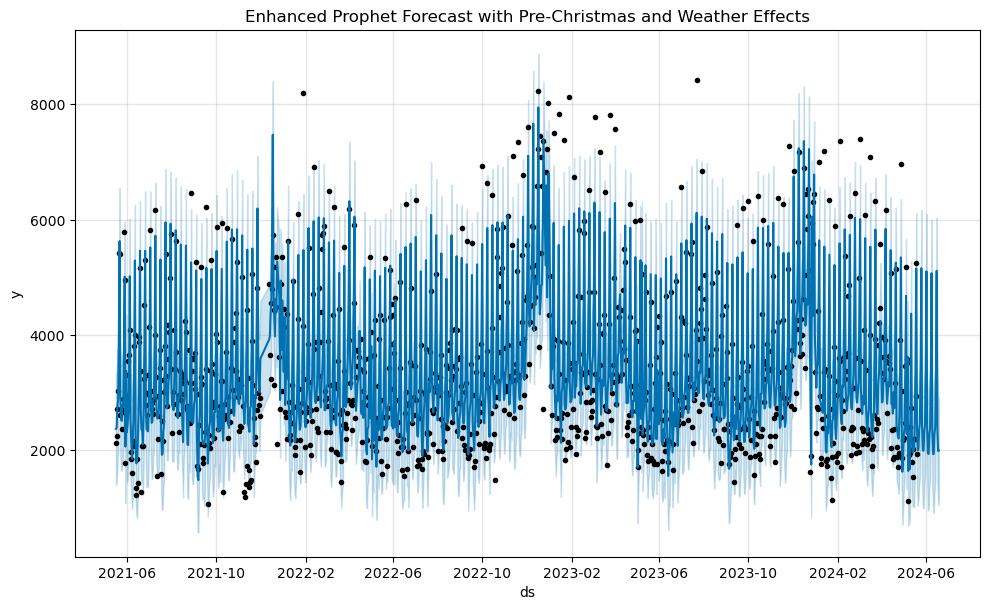

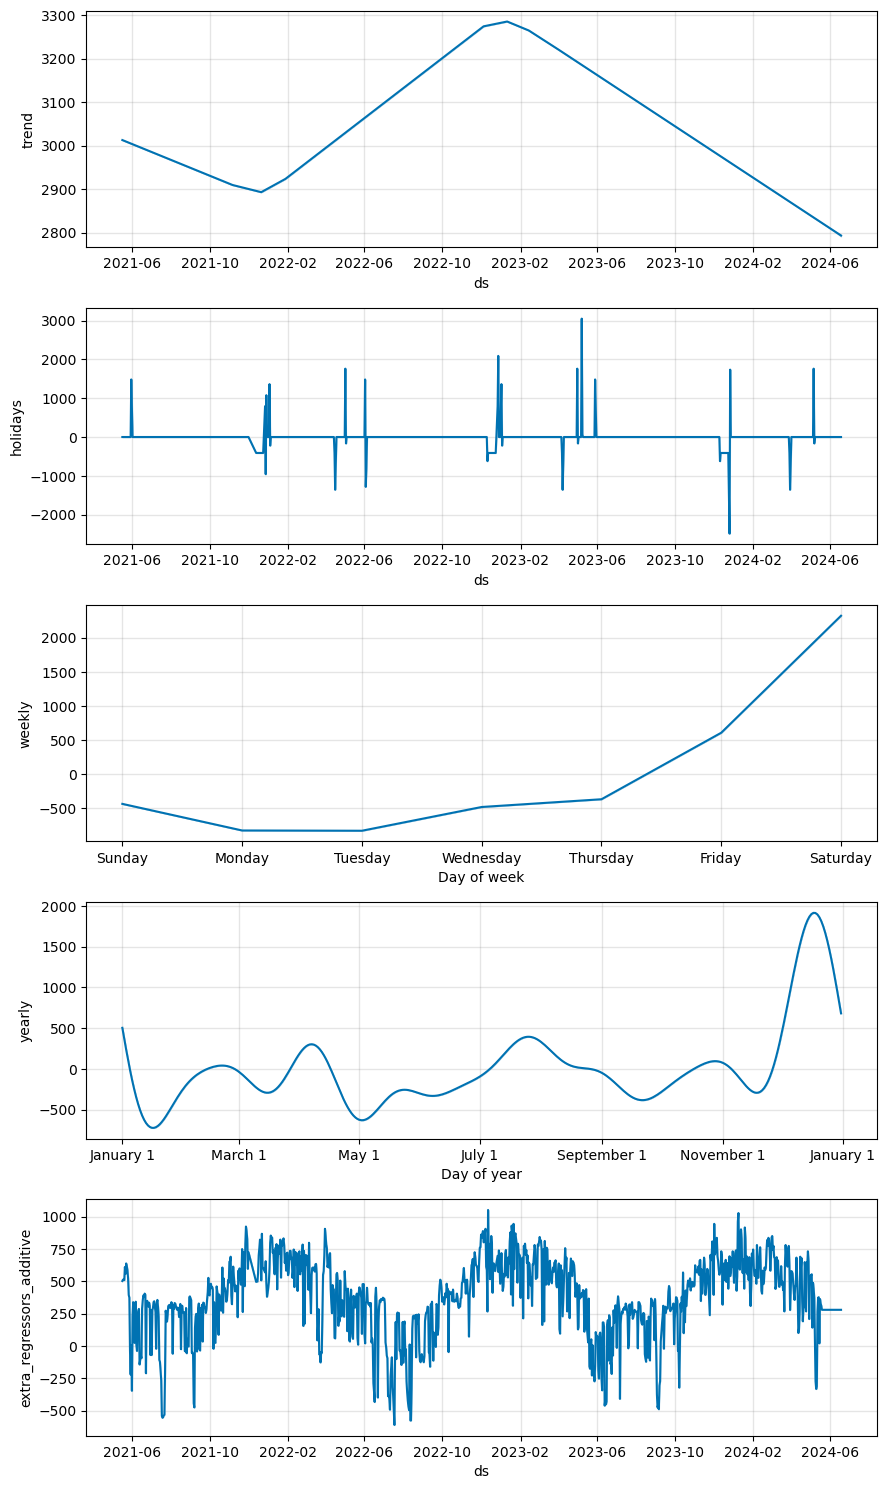

In [50]:
# Predict the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Enhanced Prophet Forecast with Pre-Christmas and Weather Effects')

# Plot the forecast components
components_fig = model.plot_components(forecast)


In [51]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

# Assuming 'model' is your already trained Prophet model
# Specify the initial period for training, the period for each fold, and the horizon for each prediction
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '30 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p.head())


  0%|          | 0/2 [00:00<?, ?it/s]

18:11:49 - cmdstanpy - INFO - Chain [1] start processing
18:11:49 - cmdstanpy - INFO - Chain [1] done processing
18:11:50 - cmdstanpy - INFO - Chain [1] start processing
18:11:50 - cmdstanpy - INFO - Chain [1] done processing


  horizon            mse        rmse         mae      mape     mdape  \
0  3 days  175736.353717  419.209200  362.834209  0.132248  0.114608   
1  4 days  128362.011950  358.276446  328.805558  0.148545  0.114608   
2  5 days  108462.211058  329.336015  299.243793  0.124455  0.115886   
3  6 days  176914.171098  420.611663  383.338015  0.158350  0.122421   
4  7 days  163131.825497  403.895810  359.980808  0.125376  0.110592   

      smape  coverage  
0  0.131251       1.0  
1  0.137917       1.0  
2  0.115757       1.0  
3  0.142349       1.0  
4  0.116093       1.0  


In [52]:
print("RMSE: ", df_p['rmse'].mean())
print("MAE: ", df_p['mae'].mean())
print("MAPE: ", df_p['mape'].mean())


RMSE:  562.8761870682736
MAE:  461.37457463690754
MAPE:  0.16868683028472303


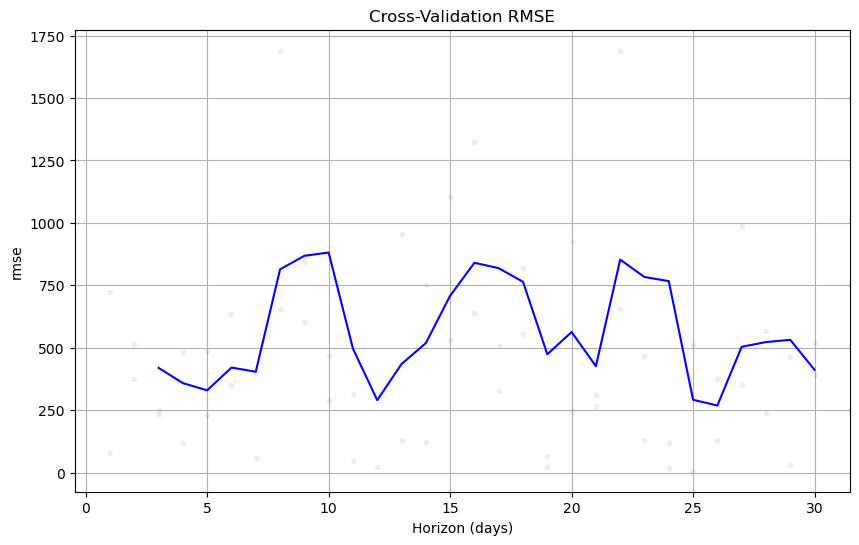

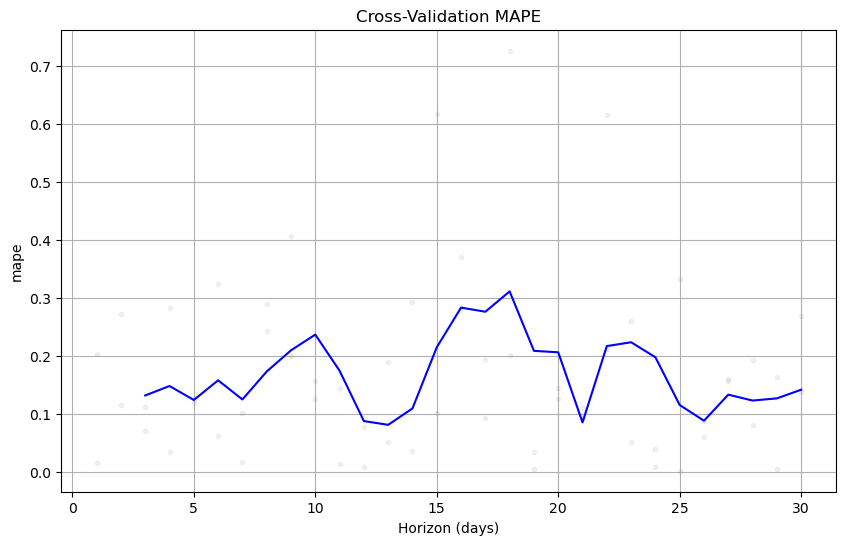

In [53]:
# Plot RMSE
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.title('Cross-Validation RMSE')
plt.show()

# Plot MAPE
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.title('Cross-Validation MAPE')
plt.show()


C:\Users\saika\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\saika\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\saika\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

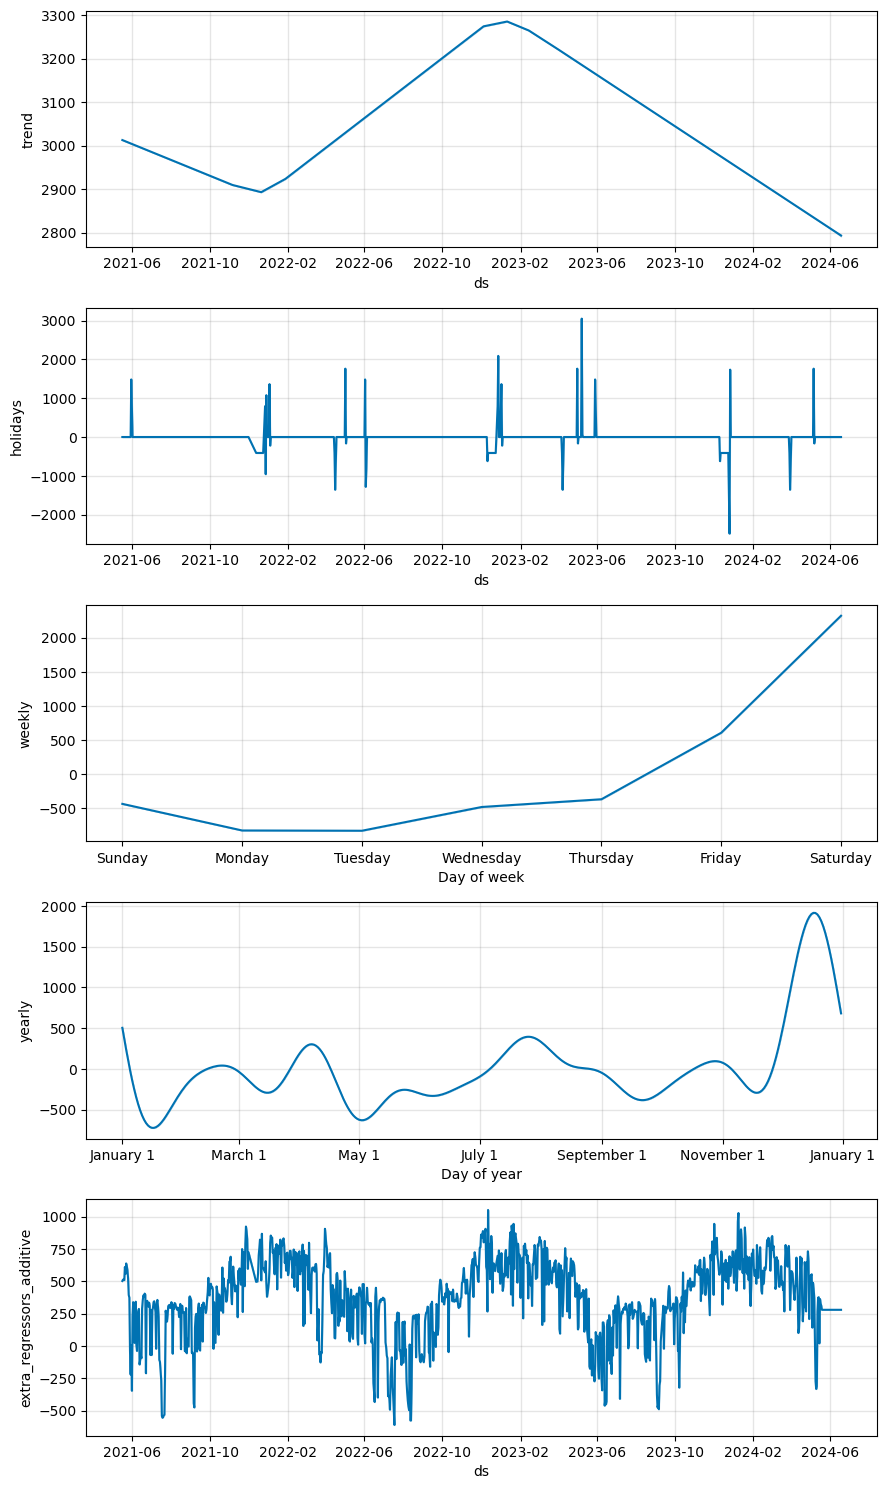

In [54]:
fig = model.plot_components(forecast)
plt.show()


In [55]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='30 days')

# Compute performance metrics
df_p = performance_metrics(df_cv)
print(df_p[['rmse', 'mae', 'mape']])

# Calculate and print the average RMSE
avg_rmse = df_p['rmse'].mean()
print("Average RMSE:", avg_rmse)

# Calculate and print the average MAE
avg_mae = df_p['mae'].mean()
print("Average MAE:", avg_mae)

# Calculate and print the average MAPE
avg_mape = df_p['mape'].mean()
print("Average MAPE:", avg_mape)


  0%|          | 0/2 [00:00<?, ?it/s]

18:14:34 - cmdstanpy - INFO - Chain [1] start processing
18:14:34 - cmdstanpy - INFO - Chain [1] done processing
18:14:34 - cmdstanpy - INFO - Chain [1] start processing
18:14:34 - cmdstanpy - INFO - Chain [1] done processing


          rmse         mae      mape
0   419.209200  362.834209  0.132248
1   358.276446  328.805558  0.148545
2   329.336015  299.243793  0.124455
3   420.611663  383.338015  0.158350
4   403.895810  359.980808  0.125376
5   813.908896  631.770822  0.173456
6   868.076527  708.238946  0.210073
7   881.286486  758.088505  0.237142
8   496.457530  428.077288  0.174865
9   289.978950  243.025355  0.088093
10  434.863119  297.890318  0.081610
11  518.405807  383.051458  0.109858
12  708.225152  599.260890  0.215251
13  840.272354  745.001808  0.283717
14  818.545742  738.123258  0.276594
15  763.958220  694.932035  0.311656
16  473.816017  382.401448  0.209169
17  562.817943  438.860931  0.206647
18  426.251804  306.228356  0.085745
19  852.782071  682.451525  0.217361
20  783.247896  586.707233  0.223984
21  766.760524  513.043107  0.198056
22  291.500760  208.652336  0.115795
23  268.602090  193.440863  0.088674
24  503.606560  394.475735  0.133640
25  522.757984  442.400774  0.123489
2

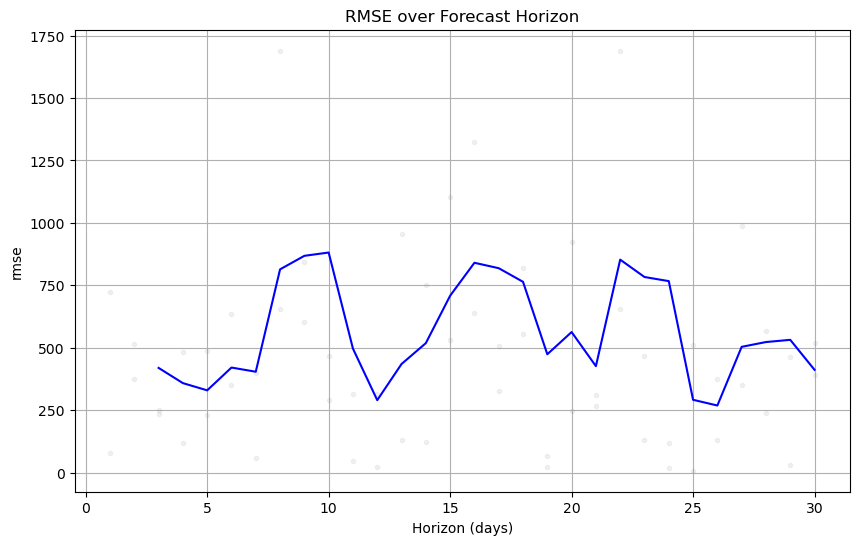

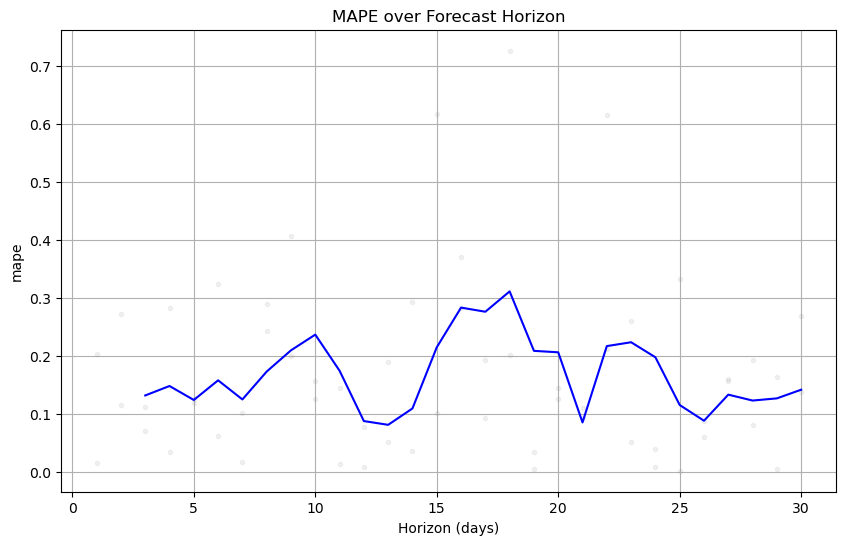

In [56]:
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

# Plot RMSE
fig_rmse = plot_cross_validation_metric(df_cv, metric='rmse')
plt.title('RMSE over Forecast Horizon')
plt.show()

# Plot MAPE
fig_mape = plot_cross_validation_metric(df_cv, metric='mape')
plt.title('MAPE over Forecast Horizon')
plt.show()


  0%|          | 0/2 [00:00<?, ?it/s]

18:16:49 - cmdstanpy - INFO - Chain [1] start processing
18:16:49 - cmdstanpy - INFO - Chain [1] done processing
18:16:49 - cmdstanpy - INFO - Chain [1] start processing
18:16:49 - cmdstanpy - INFO - Chain [1] done processing


Average MAPE: 16.87%


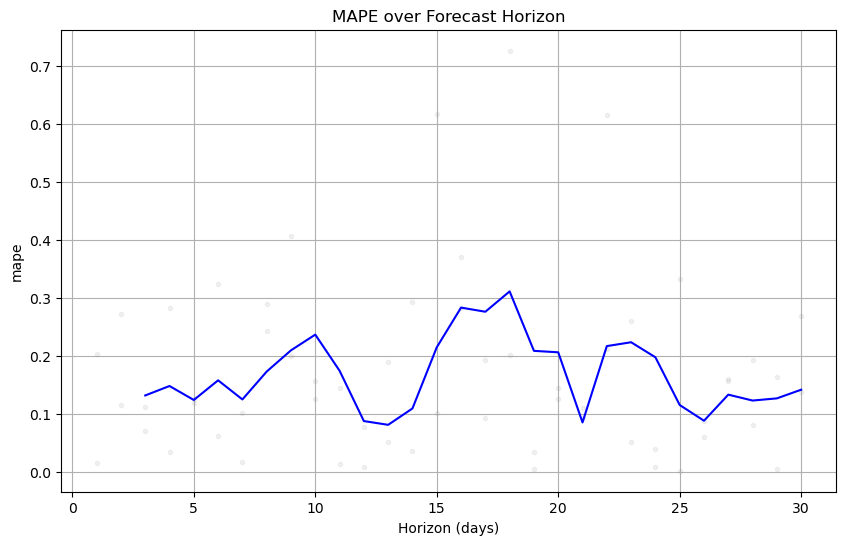

In [57]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

# Perform cross-validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='30 days')

# Compute performance metrics
df_p = performance_metrics(df_cv)

# Display MAPE
avg_mape = df_p['mape'].mean()
print(f"Average MAPE: {avg_mape*100:.2f}%")

# Visualize the MAPE over the horizon
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.title('MAPE over Forecast Horizon')
plt.show()


  0%|          | 0/2 [00:00<?, ?it/s]

18:17:05 - cmdstanpy - INFO - Chain [1] start processing
18:17:05 - cmdstanpy - INFO - Chain [1] done processing
18:17:06 - cmdstanpy - INFO - Chain [1] start processing
18:17:06 - cmdstanpy - INFO - Chain [1] done processing


R-squared: 0.79


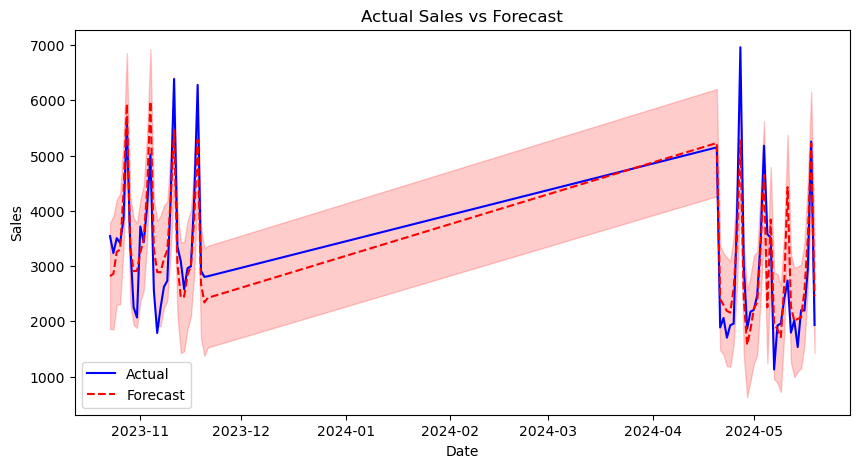

In [58]:
from prophet.diagnostics import cross_validation, performance_metrics
import numpy as np

# Assume 'model' is your trained Prophet model
# Perform cross-validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='30 days')

# Calculate SSR (sum of squares of residuals)
ssr = np.sum((df_cv['y'] - df_cv['yhat'])**2)

# Calculate SST (total sum of squares)
sst = np.sum((df_cv['y'] - np.mean(df_cv['y']))**2)

# Calculate R-squared
r_squared = 1 - (ssr / sst)
print(f"R-squared: {r_squared:.2f}")

# Optional: Visualizing predictions vs actuals can also help understand the fit
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_cv['ds'], df_cv['y'], 'b-', label='Actual')
plt.plot(df_cv['ds'], df_cv['yhat'], 'r--', label='Forecast')
plt.fill_between(df_cv['ds'], df_cv['yhat_lower'], df_cv['yhat_upper'], color='red', alpha=0.2)
plt.title('Actual Sales vs Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [69]:
import pandas as pd
from prophet import Prophet

# Load your dataset
data = pd.read_csv('Test_Combined_Sales_Data.csv')
data['ds'] = pd.to_datetime(data['Date'], dayfirst=True)
data['y'] = data['TotalNetSales']
data['temperature'] = data['feelslike']  # Using 'feelslike' as 'temperature'

# Initialize and prepare your Prophet model
model = Prophet()
model.add_regressor('temperature')
model.fit(data[['ds', 'y', 'temperature']])

# Define the period for forecasting
start_date = pd.to_datetime('2024-05-20')
end_date = start_date + pd.Timedelta(weeks=4)

# Create a dataframe for future dates that we need predictions for
future_data = pd.DataFrame({'ds': pd.date_range(start_date, end_date)})
future_data['temperature'] = data.loc[data['ds'].isin(future_data['ds']), 'temperature'].values

# Predict sales for these dates
forecast = model.predict(future_data[['ds', 'temperature']])

# Prepare forecasted sales for merging, rounded to two decimals
forecasted_sales = forecast[['ds', 'yhat']]
forecasted_sales.columns = ['Date', 'ForecastedTotalNetSales']
forecasted_sales['Date'] = pd.to_datetime(forecasted_sales['Date'])
forecasted_sales['ForecastedTotalNetSales'] = forecasted_sales['ForecastedTotalNetSales'].round(2)  # Round to two decimals

# Merge forecasted sales back into the original dataset on 'Date'
data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' in main dataset is also datetime
data = data.merge(forecasted_sales, on='Date', how='left')

# Update the 'Forecast' column
data.loc[data['Date'].isin(future_data['ds']), 'Forecast'] = data['ForecastedTotalNetSales']

# Clean up the dataset by removing unnecessary columns
data.drop(['ds', 'y', 'temperature', 'ForecastedTotalNetSales'], axis=1, inplace=True)

# Save the updated dataset with the forecasted sales
data.to_csv('final_updated_dataset_with_forecasts.csv', index=False)

# Optionally print the updated data to verify
print(data.loc[data['Date'].isin(future_data['ds'])])


19:15:31 - cmdstanpy - INFO - Chain [1] start processing
19:15:31 - cmdstanpy - INFO - Chain [1] done processing


          No       Date DateOfWeek  Eat In  TotalNetSales  Forecast  \
1075  1076.0 2024-05-20        Mon     NaN            NaN   1894.74   
1076  1077.0 2024-05-21        Tue     NaN            NaN   1854.67   
1077  1078.0 2024-05-22        Wed     NaN            NaN   2297.38   
1078  1079.0 2024-05-23        Thu     NaN            NaN   2452.34   
1079  1080.0 2024-05-24        Fri     NaN            NaN   3294.87   
1080  1081.0 2024-05-25        Sat     NaN            NaN   4885.66   
1081  1082.0 2024-05-26        Sun     NaN            NaN   2277.28   
1082  1083.0 2024-05-27        Mon     NaN            NaN   2017.65   
1083  1084.0 2024-05-28        Tue     NaN            NaN   1825.76   
1084  1085.0 2024-05-29        Wed     NaN            NaN   2158.90   
1085  1086.0 2024-05-30        Thu     NaN            NaN   2297.14   
1086  1087.0 2024-05-31        Fri     NaN            NaN   3115.39   
1087  1088.0 2024-06-01        Sat     NaN            NaN   4801.92   
1088  

C:\Users\saika\AppData\Local\Temp\ipykernel_3820\4204685969.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_sales['Date'] = pd.to_datetime(forecasted_sales['Date'])
C:\Users\saika\AppData\Local\Temp\ipykernel_3820\4204685969.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_sales['ForecastedTotalNetSales'] = forecasted_sales['ForecastedTotalNetSales'].round(2)  # Round to two decimals
C:\Users\saika\AppData\Local\Temp\ipykernel_3820\4204685969.py:33: UserWarning: Parsing dates 